In [40]:
import pandas as pd

In [41]:
pwd

'C:\\Users\\Rajdeep\\Desktop\\data_mining\\tensor_flow_RNN\\tensor-flow-exps\\TensorFlowClassification'

In [42]:
diabetes = pd.read_csv('C:/Users/Rajdeep/Desktop/data_mining/tensor_flow_RNN/Tensorflow-Bootcamp-master/02-TensorFlow-Basics/pima-indians-diabetes.csv')

In [43]:
diabetes.head()

,Number_pregnant,Glucose_concentration,Blood_pressure,Triceps,Insulin,BMI,Pedigree,Age,Class,Group
0,6,0.743719,0.590164,0.353535,0.000000,0.500745,0.234415,50,1,B
1,1,0.427136,0.540984,0.292929,0.000000,0.396423,0.116567,31,0,C
2,8,0.919598,0.524590,0.000000,0.000000,0.347243,0.253629,32,1,B
3,1,0.447236,0.540984,0.232323,0.111111,0.418778,0.038002,21,0,B
4,0,0.688442,0.327869,0.353535,0.198582,0.642325,0.943638,33,1,C


In [44]:
# Notice that there is a categorical column called group

In [45]:
# we would like to basically classify based on the class

## Normalization of the data

In [46]:
diabetes.columns

Index(['Number_pregnant', 'Glucose_concentration', 'Blood_pressure', 'Triceps',
       'Insulin', 'BMI', 'Pedigree', 'Age', 'Class', 'Group'],
      dtype='object')

In [47]:
cols_to_norm = ['Number_pregnant', 'Glucose_concentration', 'Blood_pressure', 'Triceps',
       'Insulin', 'BMI', 'Pedigree']

In [48]:
diabetes[cols_to_norm] = diabetes[cols_to_norm].apply(lambda x: (x-x.min())/( x.max()-x.min() ) ) # this is essentially
# min_max normalization

In [49]:
diabetes.head()

,Number_pregnant,Glucose_concentration,Blood_pressure,Triceps,Insulin,BMI,Pedigree,Age,Class,Group
0,0.352941,0.743719,0.590164,0.353535,0.000000,0.500745,0.234415,50,1,B
1,0.058824,0.427136,0.540984,0.292929,0.000000,0.396423,0.116567,31,0,C
2,0.470588,0.919598,0.524590,0.000000,0.000000,0.347243,0.253629,32,1,B
3,0.058824,0.447236,0.540984,0.232323,0.111111,0.418778,0.038002,21,0,B
4,0.000000,0.688442,0.327869,0.353535,0.198582,0.642325,0.943638,33,1,C


In [50]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [51]:
num_preg = tf.feature_column.numeric_column('Number_pregnant')
plasma_gluc = tf.feature_column.numeric_column('Glucose_concentration')
dias_press = tf.feature_column.numeric_column('Blood_pressure')
tricep = tf.feature_column.numeric_column('Triceps')
insulin = tf.feature_column.numeric_column('Insulin')
bmi = tf.feature_column.numeric_column('BMI')
diabetes_pedigree = tf.feature_column.numeric_column('Pedigree')
age = tf.feature_column.numeric_column('Age') # basically made feature columns for everything

In [52]:
# There are essentially 2 main ways of dealing with categorical values-Vocavulary list and hash bucket

In [53]:
assigned_group = tf.feature_column.categorical_column_with_vocabulary_list('Group', ['A', 'B', 'C', 'D']) 
# Here note that we are having 4 categorical features and that is something we already know 

In [54]:
# what if we do not know all the groups we have or if its just too many and we do not know before hand we can use a hash
# bucket

In [55]:
#assigned_group = tf.feature_column.categorical_column_with_hash_bucket('Group', hash_bucket_size=10)
# hash_bucket_size is simply the max number of categories that we can think wil be in the column

In [56]:
# Sometimes we may have to convert continuous columns into categorical columns. This may be a great way in which we can gather 
# more information. This is feature engineering in action. 
# Here in the dataset we can see that in the Age column which is continuous however we can use it as categorical data

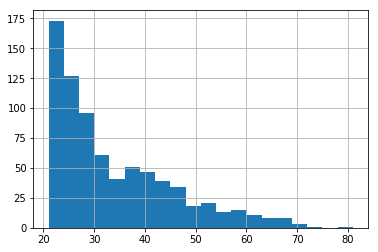

In [57]:
diabetes['Age'].hist(bins=20)

In [58]:
age_bucket = tf.feature_column.bucketized_column(age, boundaries=[20,30,40,50,60,70,80]) # this is how we can convert a 
# continuous numeric column into a categocial column. The boundaries desctribe the categories

In [59]:
feature_cols = [num_preg, plasma_gluc, dias_press, tricep, insulin, bmi, diabetes_pedigree, assigned_group, age_bucket]

In [60]:
# perform a train test split

In [61]:
x_data = diabetes.drop('Class', axis=1)

In [62]:
x_data.head()

,Number_pregnant,Glucose_concentration,Blood_pressure,Triceps,Insulin,BMI,Pedigree,Age,Group
0,0.352941,0.743719,0.590164,0.353535,0.000000,0.500745,0.234415,50,B
1,0.058824,0.427136,0.540984,0.292929,0.000000,0.396423,0.116567,31,C
2,0.470588,0.919598,0.524590,0.000000,0.000000,0.347243,0.253629,32,B
3,0.058824,0.447236,0.540984,0.232323,0.111111,0.418778,0.038002,21,B
4,0.000000,0.688442,0.327869,0.353535,0.198582,0.642325,0.943638,33,C


In [63]:
labels = diabetes['Class']

In [64]:
from sklearn.model_selection import train_test_split

In [65]:
X_train, X_test, y_train, y_test = train_test_split(x_data, labels, test_size=0.3, random_state=101)

In [66]:
# Now that we have the data ready we need to get the input function ready

In [67]:
# remember that we are going to follow this same trend:
# get the data ready in the form of a pandas dataframe
# get the train test split done on the data
# create the input function
# create the model
input_func = tf.estimator.inputs.pandas_input_fn(x=X_train, y=y_train, batch_size=10, num_epochs=1000, shuffle=True)

In [68]:
model = tf.estimator.LinearClassifier(feature_columns=feature_cols, n_classes=2) # recall we are using the Class attribute
# for classifying which has only 2 classes

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_task_id': 0, '_evaluation_master': '', '_session_config': None, '_tf_random_seed': None, '_save_checkpoints_secs': 600, '_model_dir': 'C:\\Users\\Rajdeep\\AppData\\Local\\Temp\\tmpvsov2p1i', '_num_worker_replicas': 1, '_save_checkpoints_steps': None, '_is_chief': True, '_global_id_in_cluster': 0, '_master': '', '_save_summary_steps': 100, '_num_ps_replicas': 0, '_service': None, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x0000024D5501DA58>, '_task_type': 'worker', '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100}


In [69]:
model.train(input_fn=input_func, steps=1000)

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Saving checkpoints for 1 into C:\Users\Rajdeep\AppData\Local\Temp\tmpvsov2p1i\model.ckpt.
INFO:tensorflow:loss = 6.931472, step = 1
INFO:tensorflow:global_step/sec: 186.068
INFO:tensorflow:loss = 6.597336, step = 101 (0.560 sec)
INFO:tensorflow:global_step/sec: 339.182
INFO:tensorflow:loss = 5.3513675, step = 201 (0.288 sec)
INFO:tensorflow:global_step/sec: 343.679
INFO:tensorflow:loss = 5.5681915, step = 301 (0.275 sec)
INFO:tensorflow:global_step/sec: 360.21
INFO:tensorflow:loss = 4.473128, step = 401 (0.293 sec)
INFO:tensorflow:global_step/sec: 353.767
INFO:tensorflow:loss = 5.354785, step = 501 (0.278 sec)
INFO:tensorflow:global_step/sec: 343.583
INFO:tensorflow:loss = 5.9501247, step = 601 (0.280 sec)
INFO:tensorflow:global_step/sec

In [70]:
eval_input_func = tf.estimator.inputs.pandas_input_fn(x=X_test, 
                                                      y=y_test, 
                                                      batch_size=10, 
                                                      num_epochs=1, 
                                                     shuffle=False)

In [71]:
results = model.evaluate(eval_input_func)

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2018-04-24-06:03:54
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from C:\Users\Rajdeep\AppData\Local\Temp\tmpvsov2p1i\model.ckpt-1000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Finished evaluation at 2018-04-24-06:03:55
INFO:tensorflow:Saving dict for global step 1000: accuracy = 0.73593074, accuracy_baseline = 0.64935064, auc = 0.80320984, auc_precision_recall = 0.6537986, average_loss = 0.5316887, global_step = 1000, label/mean = 0.35064936, loss = 5.1175036, prediction/mean = 0.40806204


In [72]:
results

{'accuracy': 0.73593074,
 'accuracy_baseline': 0.64935064,
 'auc': 0.80320984,
 'auc_precision_recall': 0.6537986,
 'average_loss': 0.5316887,
 'global_step': 1000,
 'label/mean': 0.35064936,
 'loss': 5.1175036,
 'prediction/mean': 0.40806204}

In [73]:
pred_input_func = tf.estimator.inputs.pandas_input_fn(x=X_test, 
                                                     batch_size=10,
                                                     num_epochs=1,
                                                     shuffle=False)

In [74]:
predictions = model.predict(pred_input_func)

In [75]:
predictions = list(predictions)

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from C:\Users\Rajdeep\AppData\Local\Temp\tmpvsov2p1i\model.ckpt-1000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.


In [76]:
predictions

[{'class_ids': array([1], dtype=int64),
  'classes': array([b'1'], dtype=object),
  'logistic': array([0.5660893], dtype=float32),
  'logits': array([0.26591295], dtype=float32),
  'probabilities': array([0.43391073, 0.5660893 ], dtype=float32)},
 {'class_ids': array([1], dtype=int64),
  'classes': array([b'1'], dtype=object),
  'logistic': array([0.69093585], dtype=float32),
  'logits': array([0.804498], dtype=float32),
  'probabilities': array([0.30906418, 0.69093585], dtype=float32)},
 {'class_ids': array([0], dtype=int64),
  'classes': array([b'0'], dtype=object),
  'logistic': array([0.41489023], dtype=float32),
  'logits': array([-0.34378558], dtype=float32),
  'probabilities': array([0.5851098 , 0.41489017], dtype=float32)},
 {'class_ids': array([0], dtype=int64),
  'classes': array([b'0'], dtype=object),
  'logistic': array([0.3852183], dtype=float32),
  'logits': array([-0.46745718], dtype=float32),
  'probabilities': array([0.61478174, 0.3852183 ], dtype=float32)},
 {'class_i

## Dense neural Network classifier for the same problem

In [77]:
dnn_model = tf.estimator.DNNClassifier(hidden_units=[10,10,10], feature_columns=feature_cols, n_classes=2)

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_task_id': 0, '_evaluation_master': '', '_session_config': None, '_tf_random_seed': None, '_save_checkpoints_secs': 600, '_model_dir': 'C:\\Users\\Rajdeep\\AppData\\Local\\Temp\\tmp9mkxx4g0', '_num_worker_replicas': 1, '_save_checkpoints_steps': None, '_is_chief': True, '_global_id_in_cluster': 0, '_master': '', '_save_summary_steps': 100, '_num_ps_replicas': 0, '_service': None, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x0000024D5B4E1470>, '_task_type': 'worker', '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100}


In [78]:
# if we try to get the dnn_model trained on the same input function it will give us an error. If we are using a feature_col
# and trying to use that in a densely connected neural network it will give us an error because we need to wrap
# the columns in a densely connected neural network

In [80]:
embedded_group_col = tf.feature_column.embedding_column(assigned_group, dimension=4) # age_bucket is also a categorical column
# however it is actually a bucketized column in tensorflow terms hence we are only required to use embedding column in case of 
# categorical_column using vocab list and categorical columns using a hash bucket
# note that embedding column is only for DNNClassifier

In [81]:
feat_cols = [num_preg, plasma_gluc, dias_press, tricep, insulin, bmi, diabetes_pedigree, embedded_group_col, age_bucket]

In [82]:
input_func = tf.estimator.inputs.pandas_input_fn(X_train, y_train, batch_size=10, num_epochs=1000, shuffle=True)

In [83]:
dnn_model = tf.estimator.DNNClassifier(hidden_units=[10,10,10], feature_columns=feat_cols, n_classes=2)

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_task_id': 0, '_evaluation_master': '', '_session_config': None, '_tf_random_seed': None, '_save_checkpoints_secs': 600, '_model_dir': 'C:\\Users\\Rajdeep\\AppData\\Local\\Temp\\tmp1lh41hvg', '_num_worker_replicas': 1, '_save_checkpoints_steps': None, '_is_chief': True, '_global_id_in_cluster': 0, '_master': '', '_save_summary_steps': 100, '_num_ps_replicas': 0, '_service': None, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x0000024D5B24C898>, '_task_type': 'worker', '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100}


In [84]:
dnn_model.train(input_fn=input_func, steps=1000)

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Saving checkpoints for 1 into C:\Users\Rajdeep\AppData\Local\Temp\tmp1lh41hvg\model.ckpt.
INFO:tensorflow:loss = 6.836735, step = 1
INFO:tensorflow:global_step/sec: 179.456
INFO:tensorflow:loss = 7.310501, step = 101 (0.560 sec)
INFO:tensorflow:global_step/sec: 294.341
INFO:tensorflow:loss = 5.557934, step = 201 (0.340 sec)
INFO:tensorflow:global_step/sec: 307.927
INFO:tensorflow:loss = 5.8752694, step = 301 (0.323 sec)
INFO:tensorflow:global_step/sec: 307.948
INFO:tensorflow:loss = 4.044186, step = 401 (0.325 sec)
INFO:tensorflow:global_step/sec: 313.257
INFO:tensorflow:loss = 5.085052, step = 501 (0.319 sec)
INFO:tensorflow:global_step/sec: 228.933
INFO:tensorflow:loss = 5.0167227, step = 601 (0.439 sec)
INFO:tensorflow:global_step/sec

In [85]:
eval_input_func = tf.estimator.inputs.pandas_input_fn(X_test, y_test, batch_size=10, num_epochs=1, shuffle=False)

In [86]:
dnn_model.evaluate(eval_input_func)

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2018-04-24-06:12:47
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from C:\Users\Rajdeep\AppData\Local\Temp\tmp1lh41hvg\model.ckpt-1000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Finished evaluation at 2018-04-24-06:12:48
INFO:tensorflow:Saving dict for global step 1000: accuracy = 0.77056277, accuracy_baseline = 0.64935064, auc = 0.8268313, auc_precision_recall = 0.68734217, average_loss = 0.49580503, global_step = 1000, label/mean = 0.35064936, loss = 4.7721233, prediction/mean = 0.30845365


{'accuracy': 0.77056277,
 'accuracy_baseline': 0.64935064,
 'auc': 0.8268313,
 'auc_precision_recall': 0.68734217,
 'average_loss': 0.49580503,
 'global_step': 1000,
 'label/mean': 0.35064936,
 'loss': 4.7721233,
 'prediction/mean': 0.30845365}